In [49]:
#Check python's version
from platform import python_version
print("The current python's version is: ",python_version())

#Check the path of the current Python interpreter used to execute the script.
import sys
print("\nThe path of the current Python interpreter (should be a virtual env!):\n",sys.executable)

The current python's version is:  3.9.19

The path of the current Python interpreter (should be a virtual env!):
 /Users/laura/Progetti_Python/000_Progetti_in_corso/ML_SentimentAnalysisX/.v_env_mlX/bin/python


<h1 style="background-color:#eaeaea;font-family:Calibri;color:#fe0b50;font-size:200%;text-align:center;border-radius: 50px;padding: 10px">Machine Learning Sentiment Analysis X (Twitter) 2 -- Data from Kaggle </h1>

Machine Learning Sentiment Analysis X (Twitter)

## The Project 

The project focuses on analysing the sentiment of tweets, using a machine learning technique. 
The objective is to determine the sentiment expressed within tweets using the Naive Bayes Classifier algorithm.
This algorithm relies on Bayes' theorem and is termed 'naive' based on its assumption of conditional independence among features. The Naive Bayes Classifier is particularly effective with small datasets and weakly related features.
(The sentiment analysis is most commonly used on short texts such as reviews, tweets or messages; it is not suitable for analysing longer texts such as books.)

*Tweets taken from: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

<h1 style="background-color:#eaeaea;font-family:Calibri;color:orange;font-size:250%;text-align:center;border-radius:50px;padding:10px 30px;">Index</h1>

INDEX

- [Libraries & Utilities](#0)

- [Data Preprocessing](#1)
    - [Importing Data](#1-1)
    - [Tokenisation and text cleaning](#1-2)
    - [Feature Extraction](#1-3)
- [The Dataset](#2)
    - [Cleansing the tweets](#2-1)
    - [Extracts the word frequency features](#2-2)
    - [Splitting the dataset](#2-3)
- [The Model](#3)
    - [Training the model](#3-1)
    - [Test the model and calculates the accuracy](#3-2)
    - [Test the model on new data](#3-3)


<a id = '0'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:blue;font-size:250%;text-align:center;border-radius:50px;padding:10px 30px;">Libraries</h1>

<a id = '0'></a>
<h1 style="font-size: 150%;">Libraries & Utilities</h1>

In [50]:
#Install all the libraries the project needs
#pip install -r requirements.txt 

import nltk
import re
import kaggle
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords') #collection of stopwords
from sklearn.model_selection import train_test_split
from nltk.classify import NaiveBayesClassifier

import warnings #only for os
warnings.filterwarnings("ignore") #only for os

[nltk_data] Downloading package stopwords to /Users/laura/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Libraries:
1. ***nltk***
-> Used for natural language processing
2. ***re***
-> Used to regular expression
3. ***kaggle***
-> Used to access the Kaggle API
4. ***pandas***
-> Used to parse data; among its main functionalities is the creation of the data structure called DataFrame.
5. ***openpyxl***
-> Used to open the data structure
6. ***matplotlib***
-> Used to plot graphs
7. ***TweetTokenizer***
-> Used to tokenize tweets into words
8. ***PorterStemmer***
-> Used to stem words to their roots form
9. ***stopwords***
-> Used to remove stopwords from tweets - collection of common words that are often removed during text preprocessing
10. ***train_test_split***
-> Used to split the dataset into train and test sets
11. ***NaiveBayesClassifier***
-> Used to train a Naive Bayes classifier for text classification
12. ***warnings***
-> Used to handle warnings during code execution.

<a id = '1'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:green;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">Data Preprocessing</h1>

<a id = '1-1'></a>
<h1 style="font-size: 150%;">Importing Data</h1>

In [46]:
#Api's kaggle
kaggle.api = kaggle.KaggleApi()
kaggle.api.authenticate()
kaggle.api.dataset_download_files('jp797498e/twitter-entity-sentiment-analysis', 
                                  path='./Input_nbook_1',
                                  unzip = True) #True -> Unzip file


Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis


In [47]:
#Variables creation
df_train = pd.read_csv('Input_nbook_1/twitter_training.csv', header = None)
df_val = pd.read_csv('Input_nbook_1/twitter_validation.csv', header = None)

#Add name's columns
column_names = ['Num', 'Name', 'Value', 'Tweet']  # Sostituisci con i nomi delle tue colonne
df_train.columns = column_names
df_val.columns = column_names

In [48]:
#Coloums of the datasets
print(list(df_train.columns), 'The number of df_train is:', (df_train.shape[0]))
print(list(df_val.columns), 'The number of df_val is:', (df_val.shape[0]))
print('\nTotal rows number:',((df_train.shape[0]) + (df_val.shape[0]) ) )

['Num', 'Name', 'Value', 'Tweet'] The number of df_train is: 74682
['Num', 'Name', 'Value', 'Tweet'] The number of df_val is: 1000

Total rows number: 75682


In [7]:
#The coloums are the same: is possible join the datasets
frames = [df_train, df_val]
all_df = pd.concat(frames)

#info about DataFrame
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75682 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Num     75682 non-null  int64 
 1   Name    75682 non-null  object
 2   Value   75682 non-null  object
 3   Tweet   74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [8]:
unique_values = all_df['Value'].unique()
print(unique_values)

['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [9]:
#Needs only the Value and Tweet column 
df = all_df. drop(['Num','Name'], axis=1) 
df_count_row = df.shape[0]

#Deletes the douplicates values
df_clean = df. drop_duplicates(inplace=False)
df_clean_count_row = df_clean.shape[0]

print("The number of tweets unique are:", df_clean_count_row)
print("Duplicates eliminated:", df_count_row - df_clean_count_row)

df_clean.head(1)

The number of tweets unique are: 70256
Duplicates eliminated: 5426


,Value,Tweet
0,Positive,im getting on borderlands and i will murder yo...


In [10]:
#Create 4 lists, one for each type: positive, neutral, negative and irrelevant + 1 list for nan values
pos_tweets = []
neut_tweets = []
neg_tweets = []
irr_tweets = []
nan_tweets = []

#Iterate over each row in the cleaned DataFrame
for index, row in df_clean.iterrows():
    tweet = row['Tweet']
    value = row['Value']  # Assuming 'Value' contains labels like 'Positive', 'Neutral', or 'Negative'
    
    #Check if the tweet is NaN and append it to the nan_tweets list
    if pd.isna(tweet):
        nan_tweets.append(tweet)
    else:
        # Otherwise, append the tweet to the respective list based on its label
        if value == 'Positive':
            pos_tweets.append(tweet)
        elif value == 'Neutral':
            neut_tweets.append(tweet)
        elif value == 'Negative':
            neg_tweets.append(tweet)
        elif value == 'Irrelevant':
            irr_tweets.append(tweet)

<a id = '1-2'></a>
<h1 style="font-size: 150%;">Tokenisation and text cleaning</h1>

In [11]:
#Tokenization = breaks down a text into individual words or tokens
tokenizer = TweetTokenizer(preserve_case = False, strip_handles = True, reduce_len = True)

In [12]:
#Cleansing text from useless characters and removes them from the original text

#obtains a list of stopwords in English
stop_words = stopwords.words('english')

#creates an instance of PorterStemmer, which enables text stemming using Porter's algorithm.
#stemming words = reducing them to their root or basic form, removing any suffixes or prefixes
stemmer = PorterStemmer()

def clean_tweet(tweet):
    #removes all dollar signs followed by a sequence of alphanumeric characters from the tweet
    tweet = re.sub(r'\$\w*', '', tweet)  
    #revomes all URL links in the tweet
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)  
    #removes all '#' in the tweet
    tweet = re.sub(r'#', '', tweet)  
    #tokenize tweet = divide text into individual words or tokens
    tweet_tokens = tokenizer.tokenize(tweet)
    tweets_clean = []
    for word in tweet_tokens:
        #checks if the word is not a stopword and if it only consists of alphabetic characters.
        if (word not in stop_words and word.isalpha()):
            #applies stemming to each tokenized word in the tweet
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)
    #returns the list of cleaned words 
    return tweets_clean

<a id = '1-3'></a>
<h1 style="font-size: 150%;">Feature Extraction</h1>

In [13]:
#Feature Extraction

#this def calculates the frequency of each word in a list of words and returns a dictionary containing:
#the words as keys and their frequencies as values.
def get_word_frequency(words):
    word_frequency = {}
    for word in words:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
    return word_frequency

<a id = '2'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:grey;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">The dataset</h1>

<a id = '2-1'></a>
<h1 style="font-size: 150%;">Cleansing the tweets</h1>

In [14]:
#pos_cln_tokens = [clean_tweet(tweet) for tweet in pos_tweets]
pos_cln_tokens = []
for tweet in pos_tweets:
    pos_cln_tokens.append(clean_tweet(tweet))

#neut_cln_tokens = [clean_tweet(tweet) for tweet in neut_tweets]    
neut_cln_tokens = []
for tweet in neut_tweets:
    neut_cln_tokens.append(clean_tweet(tweet))

#neg_cln_tokens = [clean_tweet(tweet) for tweet in neg_tweets]    
neg_cln_tokens = []
for tweet in neg_tweets:
    neg_cln_tokens.append(clean_tweet(tweet))

#irr_cln_tokens = [clean_tweet(tweet) for tweet in irr_tweets]    
irr_cln_tokens = []
for tweet in irr_tweets:
    irr_cln_tokens.append(clean_tweet(tweet))

<a id = '2-2'></a>
<h1 style="font-size: 150%;">Extracts the word frequency features</h1>

In [15]:
#pos_feat = [(get_word_frequency(tokens), 'Positive') for tokens in pos_cln_tokens]
pos_feat = []
for tokens in pos_cln_tokens:
    pos_feat.append((get_word_frequency(tokens), 'Positive'))

#neut_feat = [(get_word_frequency(tokens), 'Positive') for tokens in neut_cln_tokens]
neut_feat = []
for tokens in neut_cln_tokens:
    neut_feat.append((get_word_frequency(tokens), 'Neutral'))

#neg_feat = [(get_word_frequency(tokens), 'Negative') for tokens in neg_cln_tokens] 
neg_feat = []
for tokens in neg_cln_tokens:
    neg_feat.append((get_word_frequency(tokens), 'Negative'))

#irr_feat = [(get_word_frequency(tokens), 'Irrelevant') for tokens in irr_cln_tokens] 
irr_feat = []
for tokens in irr_cln_tokens:
    irr_feat.append((get_word_frequency(tokens), 'Irrelevant'))

all_feat = pos_feat + neut_feat + neg_feat + irr_feat

In [60]:
#Verification of data balance

#Label's count 
num_pos = sum(1 for _, label in all_feat if label == 'Positive')
num_neut = sum(1 for _, label in all_feat if label == 'Neutral')
num_neg = sum(1 for _, label in all_feat if label == 'Negative')
num_irr = sum(1 for _, label in all_feat if label == 'Irrelevant')

#View distribution
print('Number of positive examples:', num_pos)
print('Number of neutral examples:', num_neut)
print('Number of negative examples:', num_neg)
print('Number of irrelevant examples:', num_irr)

#Calculation of proportions
total = len(all_feat)
pos_ratio = round((num_pos / total) * 100)
neut_ratio = round((num_neut / total) * 100)
neg_ratio = round((num_neg / total) * 100)
irr_ratio = round((num_irr / total) * 100)

print('\nPositive ratio:', pos_ratio,'%')
print('Neutral ratio:', neut_ratio,'%')
print('Negative ratio:', neg_ratio,'%')
print('Irrelevant ratio:', irr_ratio,'%')

if pos_ratio >= 50:
    print ('\nThe dataset is balanced')
else:
    print ('\nThe dataset is NOT balanced')

Number of positive examples: 19271
Number of neutral examples: 17281
Number of negative examples: 21329
Number of irrelevant examples: 12371

Positive ratio: 27 %
Neutral ratio: 25 %
Negative ratio: 30 %
Irrelevant ratio: 18 %

The dataset is NOT balanced


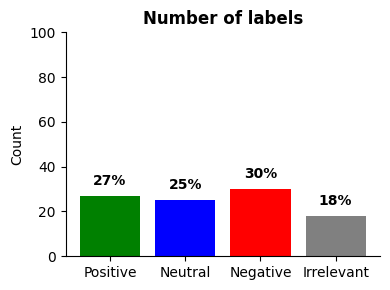

In [59]:
#graphic's labels
categories = ['Positive', 'Neutral', 'Negative','Irrelevant']
values = [pos_ratio, neut_ratio, neg_ratio, irr_ratio]
colors = ['green', 'blue', 'red', 'grey']

fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(categories, values, color=colors)
ax.set_ylabel('Count')
ax.set_ylim(0, 100)  
ax.set_title('Number of labels', weight = 'bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, value in enumerate(values):
    percentage = value / sum(values) * 100
    ax.text(i, value + 5, f'{percentage:.0f}%', ha = 'center', weight = 'bold')
plt.tight_layout()
plt.show()

...but if we aggregate the labels, reducing them to two: positive + neutrale and negative + irrelevant...

Positive ratio: 52 %
Negative ratio: 48 %

The dataset seems balanced


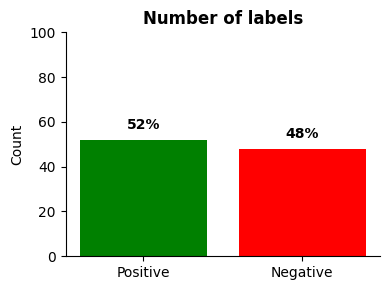

In [67]:
print('...but if we aggregate the labels, reducing them to two: positive + neutrale and negative + irrelevant...')

#Calculation of proportions aggregated
total = len(all_feat)
pos_ratio_agg = round(((num_pos + num_neut) / total) * 100)
neg_ratio_agg = round(((num_neg + num_irr) / total) * 100)

print('\nPositive ratio:', pos_ratio_agg,'%')
print('Negative ratio:', neg_ratio_agg,'%')

if pos_ratio_agg >= 50:
    print ('\nThe dataset seems balanced')
else:
    print ('\nThe dataset is NOT balanced')

#graphic's labels
categories = ['Positive', 'Negative']
values = [pos_ratio_agg, neg_ratio_agg]
colors = ['green', 'red']

fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(categories, values, color=colors)
ax.set_ylabel('Count')
ax.set_ylim(0, 100)  
ax.set_title('Number of labels', weight = 'bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, value in enumerate(values):
    percentage = value / sum(values) * 100
    ax.text(i, value + 5, f'{percentage:.0f}%', ha = 'center', weight = 'bold')
plt.tight_layout()
plt.show()

<a id = '2-3'></a>
<h1 style="font-size: 150%;">Splitting the Dataset</h1>

In [68]:
#Slitting and label examples with train for 80% and test for 20%
train_set, test_set = train_test_split(all_feat, test_size = 0.2, random_state = 42)

<a id = '3'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:violet;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">The model</h1>

<a id = '3-1'></a>
<h1 style="font-size: 150%;">Training the model</h1>

In [69]:
#Trains a Naive Bayes classifier using the 'train_set' training set
classifier = NaiveBayesClassifier.train(train_set)

<a id = '3-2'></a>
<h1 style="font-size: 150%;">Test the model and calculates the accuracy</h1>

In [72]:
def get_accuracy(test_set, classifier):
    correct = 0
    for (features, label) in test_set:
        prediction = classifier.classify(features)
        if prediction == label:
            correct += 1
    accuracy = float(correct) / len(test_set)
    return accuracy

accuracy = get_accuracy(test_set, classifier)
print('The Accuracy is:', round(accuracy * 100, 2),'%')

The Accuracy is: 72.64 %


<a id = '3-3'></a>
<h1 style="font-size: 150%;">Test the model on new data</h1>

In [71]:
def predict_sentiment(tweet):
    cleaned_tweet = clean_tweet(tweet)
    features = get_word_frequency(cleaned_tweet)
    return classifier.classify(features)

Test examples:

In [41]:
print('\nTest:')
#Example of right positive result
tweet1 = 'This movie was fantastic!I would like to watch it again'
print('\nThe tweet -> "',tweet1,'" is ', predict_sentiment(tweet1))

#Example of WRONG negative result
tweet2 = "This chicken was nasty!"
print('\nThe tweet -> "',tweet2,'" is', predict_sentiment(tweet2),'--> WRONG! Should be negative')

#Example of right result
tweet3 = "I'm in love the dogs"
print('\nThe tweet -> "',tweet3,'" is', predict_sentiment(tweet3),'--> Right!')

#Example of right result
tweet4 = "I'm a neutral comment"
print('\nThe tweet -> "',tweet4,'" is', predict_sentiment(tweet4))

#Example of WRONG negative result
tweet5 = "This pic is so bad!"
print('\nThe tweet -> "',tweet5,'" is', predict_sentiment(tweet5))

Test:

The tweet -> " This movie was fantastic!I would like to watch it again " is  Positive

The tweet -> " This chicken was nasty! " is Irrelevant --> WRONG! Should be negative

The tweet -> " I'm in love the dogs " is Positive --> Right!

The tweet -> " I'm a neutral comment " is Neutral

The tweet -> " This pic is so bad! " is Negative


#---------------------------------------------------------------#

If the labes has been only positive (positive + neutral) and negative (negative + irrelevant) the results will be:

The tweet -> " This movie was fantastic!I would like to watch it again " is  Positive 

The tweet -> " This chicken was nasty! " is Negative

The tweet -> " I'm in love the dogs " is Positive

The tweet -> " I'm a neutral comment " is Positive

The tweet -> " This pic is so bad! " is Negative